In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10-global-companies-stock-data-2024/top_10_stock_data.csv


In [47]:
df = pd.read_csv('/kaggle/input/top-10-global-companies-stock-data-2024/top_10_stock_data.csv')

In [33]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'GOOG', 'AMZN', '2222.SR', 'META',
       'BRK-B', 'TSM', 'LLY'], dtype=object)

In [34]:
df.head(10)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
5,2015-01-09,AAPL,28.167500,28.312500,27.552500,28.002501,24.971436,214798000
6,2015-01-12,AAPL,28.150000,28.157499,27.200001,27.312500,24.356121,198603200
7,2015-01-13,AAPL,27.857500,28.200001,27.227501,27.555000,24.572378,268367600
8,2015-01-14,AAPL,27.260000,27.622499,27.125000,27.450001,24.478741,195826400
9,2015-01-15,AAPL,27.500000,27.514999,26.665001,26.705000,23.814377,240056000


In [35]:
# Calculate the daily percentage change in closing prices
df['Daily Change %'] = df.groupby('Ticker')['Close'].pct_change() * 100

In [36]:
missing_values_per_column = df.isna().sum()

In [37]:
missing_values_per_column

Date               0
Ticker             0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Daily Change %    11
dtype: int64

In [38]:
missing_values_per_row = df.isna().sum(axis=1)

In [39]:
df = df.dropna()

In [40]:
max_gain_day = df.loc[df.groupby('Ticker')['Daily Change %'].idxmax()]


In [41]:
print(max_gain_day[['Date', 'Ticker', 'Close', 'Daily Change %']])

             Date   Ticker       Close  Daily Change %
14650  2020-03-10  2222.SR   25.743801        9.876540
1307   2020-03-13     AAPL   69.492500       11.980827
12232  2015-04-24     AMZN   22.254999       14.131126
19500  2020-03-13    BRK-B  196.399994       11.609929
9859   2015-07-17     GOOG   33.646500       16.052425
7428   2015-07-17    GOOGL   34.980999       16.258427
24427  2020-06-16      LLY  163.710007       15.679764
17797  2023-02-02     META  188.770004       23.282400
3738   2020-03-13     MSFT  158.830002       14.216888
5332   2016-11-11     NVDA    2.199250       29.806699
22024  2020-07-27      TSM   83.250000       12.652230


In [42]:
max_loss_day = df.loc[df.groupby('Ticker')['Daily Change %'].idxmin()]

In [43]:
max_loss_day[['Date', 'Ticker', 'Close', 'Daily Change %']]

,Date,Ticker,Close,Daily Change %
14648,2020-03-08,2222.SR,24.793388,-9.090905
1308,2020-03-16,AAPL,60.552502,-12.864696
13999,2022-04-29,AMZN,124.281502,-14.049438
19499,2020-03-12,BRK-B,175.970001,-9.592066
11032,2020-03-16,GOOG,54.216499,-11.100818
8601,2020-03-16,GOOGL,53.650002,-11.634149
23533,2016-11-23,LLY,68.000000,-10.514539
17547,2022-02-03,META,237.759995,-26.390095
3739,2020-03-16,MSFT,135.419998,-14.739031
5839,2018-11-16,NVDA,4.110750,-18.755865


In [44]:
max_volume_indices = df.groupby('Ticker')['Volume'].idxmax()

# Use these indices to get the rows with the maximum volume
highest_volume_days = df.loc[max_volume_indices]

# Display the results
print("Day(s) with the highest trading volume for each company:")
print(highest_volume_days[['Date', 'Ticker', 'Volume']])

Day(s) with the highest trading volume for each company:
             Date   Ticker      Volume
15707  2024-06-09  2222.SR   656283074
161    2015-08-24     AAPL   648825200
12174  2015-01-30     AMZN   477122000
19499  2020-03-12    BRK-B    22293800
9859   2015-07-17     GOOG   223298000
7428   2015-07-17    GOOGL   257162000
24104  2019-03-06      LLY    74822500
17731  2022-10-27     META   232316600
2447   2015-01-27     MSFT   169164000
5475   2017-06-09     NVDA  3692928000
22737  2023-05-25      TSM    60793200


/tmp/ipykernel_36/3490418797.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_close = df.groupby('Ticker')['Close'].resample('Y').last().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

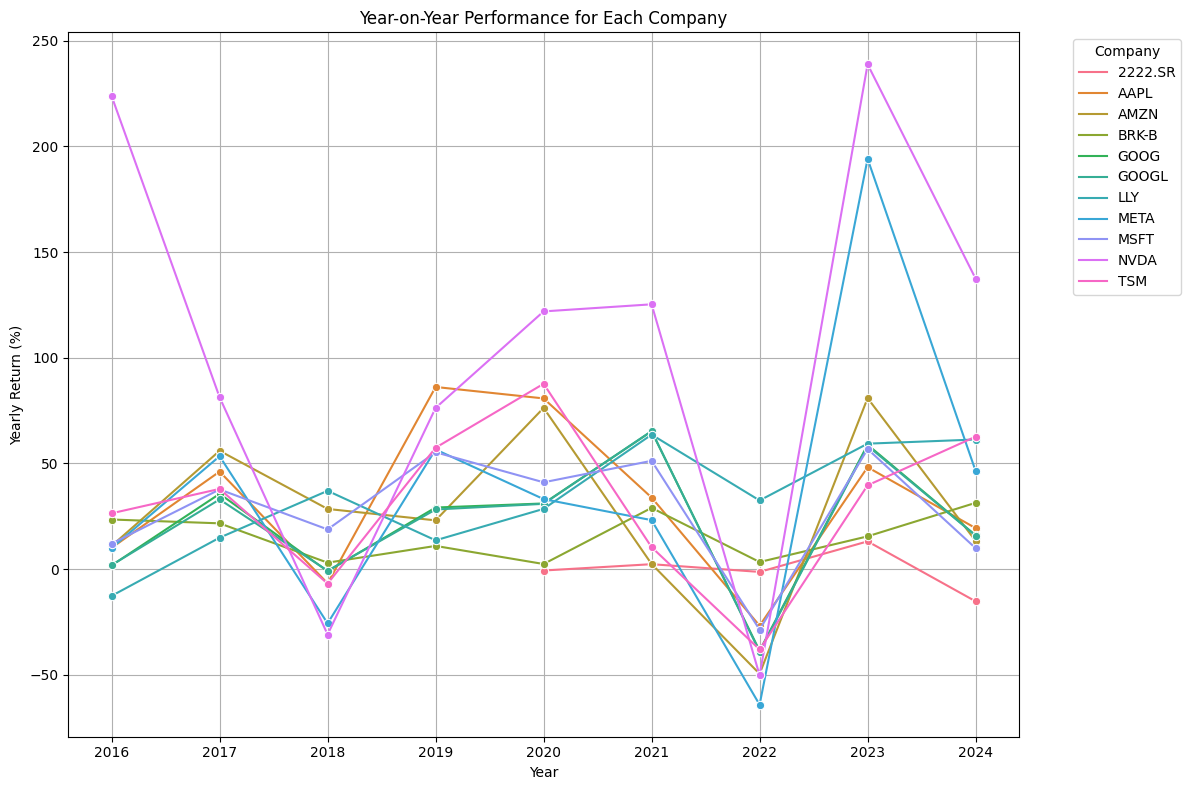

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Get the closing price at the end of each year for each company
annual_close = df.groupby('Ticker')['Close'].resample('Y').last().reset_index()

# Calculate the year-on-year percentage change
annual_close['Year'] = annual_close['Date'].dt.year
annual_close['Yearly Return %'] = annual_close.groupby('Ticker')['Close'].pct_change() * 100

# Drop rows with NaN values resulting from the percentage change calculation
annual_close = annual_close.dropna()

# Set up the plotting area
plt.figure(figsize=(12, 8))
sns.lineplot(data=annual_close, x='Year', y='Yearly Return %', hue='Ticker', marker='o')

# Customize the plot
plt.title('Year-on-Year Performance for Each Company')
plt.xlabel('Year')
plt.ylabel('Yearly Return (%)')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
colors = pivot_table.applymap(lambda x: 'background-color: green' if x > 0 else 'background-color: red')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(pivot_table.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[pivot_table[col] for col in pivot_table.columns],
               fill_color=colors.map(lambda x: x.split(': ')[1]).values.tolist(),
               align='left'))
])

fig.update_layout(title='Year-on-Year Performance Table')

fig.show()

/tmp/ipykernel_36/1862262209.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



/tmp/ipykernel_36/120373859.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



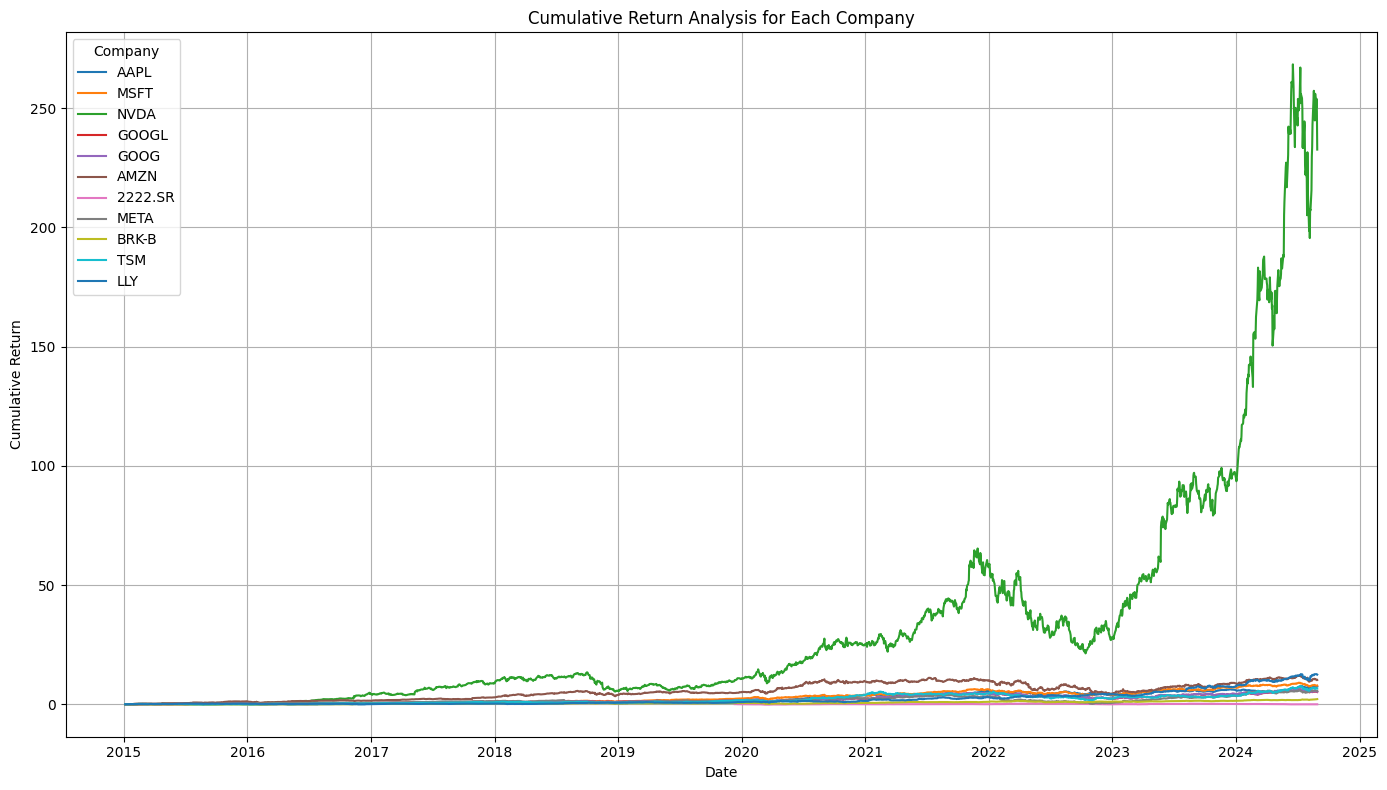

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate daily returns
df['Daily Return %'] = df.groupby('Ticker')['Close'].pct_change() * 100

# Drop rows with NaN values resulting from the percentage change calculation
df = df.dropna()

# Calculate cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return %'] / 100).groupby(df['Ticker']).cumprod() - 1

# Reset index for plotting
df.reset_index(inplace=True)

# Plot cumulative returns
plt.figure(figsize=(14, 8))
for ticker in df['Ticker'].unique():
    company_data = df[df['Ticker'] == ticker]
    plt.plot(company_data['Date'], company_data['Cumulative Return'], label=ticker)

# Customize the plot
plt.title('Cumulative Return Analysis for Each Company')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()

plt.show()


/tmp/ipykernel_36/3753814279.py:10: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



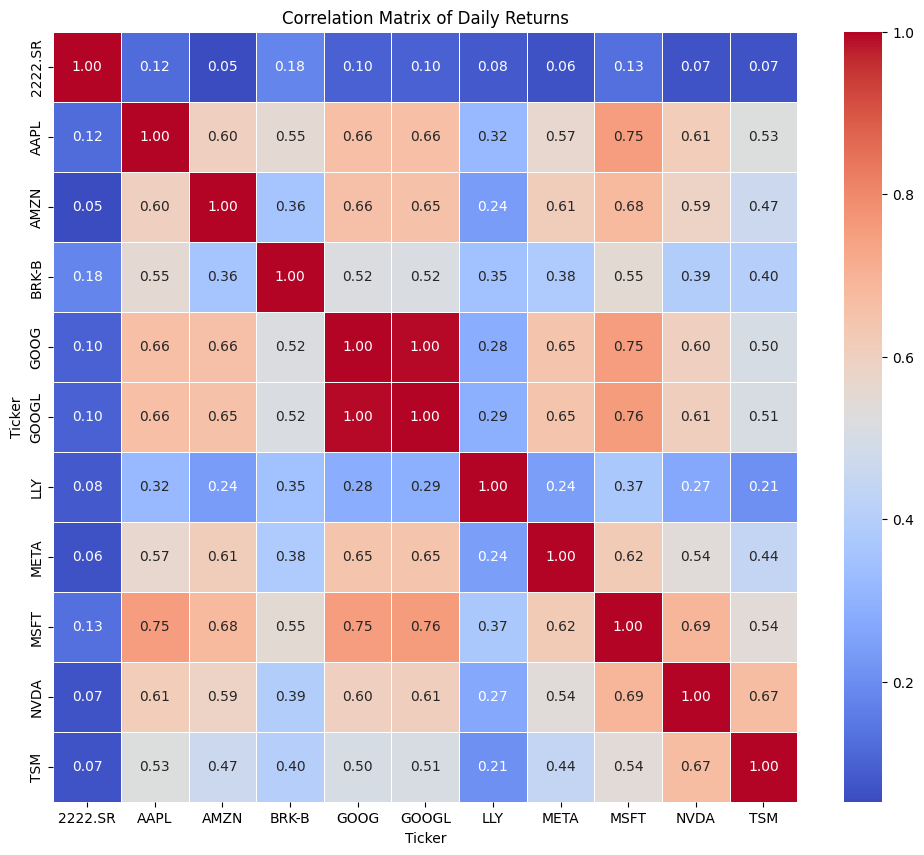

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot the data to have dates as index and tickers as columns
pivot_df = df.pivot_table(index='Date', columns='Ticker', values='Close')

# Calculate daily returns
returns = pivot_df.pct_change().dropna()

# Calculate correlation matrix of daily returns
correlation_matrix = returns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


In [63]:
import pandas as pd

import numpy as np

# Pivot the data to have dates as index and tickers as columns
pivot_df = df.pivot_table(index='Date', columns='Ticker', values='Close')

# Calculate daily returns
returns = pivot_df.pct_change().dropna()

# Calculate correlation matrix of daily returns
correlation_matrix = returns.corr()

# Get the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Stack the upper triangle and sort the pairs by correlation value
sorted_pairs = upper_triangle.stack().sort_values(ascending=False)

# Print all pairs with their correlation values
for pair, correlation in sorted_pairs.items():
    print(f'Pair: {pair}, Correlation: {correlation:.2f}')


Pair: ('GOOG', 'GOOGL'), Correlation: 1.00
Pair: ('GOOGL', 'MSFT'), Correlation: 0.76
Pair: ('GOOG', 'MSFT'), Correlation: 0.75
Pair: ('AAPL', 'MSFT'), Correlation: 0.75
Pair: ('MSFT', 'NVDA'), Correlation: 0.69
Pair: ('AMZN', 'MSFT'), Correlation: 0.68
Pair: ('NVDA', 'TSM'), Correlation: 0.67
Pair: ('AAPL', 'GOOGL'), Correlation: 0.66
Pair: ('AAPL', 'GOOG'), Correlation: 0.66
Pair: ('AMZN', 'GOOG'), Correlation: 0.66
Pair: ('AMZN', 'GOOGL'), Correlation: 0.65
Pair: ('GOOG', 'META'), Correlation: 0.65
Pair: ('GOOGL', 'META'), Correlation: 0.65
Pair: ('META', 'MSFT'), Correlation: 0.62
Pair: ('AAPL', 'NVDA'), Correlation: 0.61
Pair: ('AMZN', 'META'), Correlation: 0.61
Pair: ('GOOGL', 'NVDA'), Correlation: 0.61
Pair: ('GOOG', 'NVDA'), Correlation: 0.60
Pair: ('AAPL', 'AMZN'), Correlation: 0.60
Pair: ('AMZN', 'NVDA'), Correlation: 0.59
Pair: ('AAPL', 'META'), Correlation: 0.57
Pair: ('AAPL', 'BRK-B'), Correlation: 0.55
Pair: ('BRK-B', 'MSFT'), Correlation: 0.55
Pair: ('MSFT', 'TSM'), Corr

/tmp/ipykernel_36/357467731.py:9: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

